# Getting started with ~SFrames~ Pandas for data engineering and analysis

# Fire up Pandas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

# Load a tabular dataset

In [2]:
people = pd.read_csv("people-example.csv")

# Pandas basics

In [3]:
people # we can view first few lines of the tablesm

,First Name,Last Name,Country,age
0,Bob,Smith,United States,24
1,Alice,Williams,Canada,23
2,Malcolm,Jone,England,22
3,Felix,Brown,USA,23
4,Alex,Cooper,Poland,23
5,Tod,Campbell,United States,22
6,Derek,Ward,Switzerland,25


In [4]:
people.shape

(7, 4)

# Pandas describe method

Pandas `dtypes` method will show the **data type** of each column
* Also, `object` in pandas literally means `str` object

In [5]:
people.dtypes

First Name    object
Last Name     object
Country       object
age            int64
dtype: object

Pandas `info` method provides differnt information, including:
1. The `data type` of each column as `dtypes`
1. From the Non-Null count column you can find out about missing values.
1. At the bottom, you can see memory usage of this Dataframe.

In [6]:
people.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   First Name  7 non-null      object
 1   Last Name   7 non-null      object
 2   Country     7 non-null      object
 3   age         7 non-null      int64 
dtypes: int64(1), object(3)
memory usage: 352.0+ bytes


The `describe` method gives you descriptive statistics.
 * Normally, it'll ignore object data type; unless you force to include it.

In [7]:
people.describe()

,age
count,7.000000
mean,23.142857
std,1.069045
min,22.000000
25%,22.500000
50%,23.000000
75%,23.500000
max,25.000000


In [8]:
people.describe(include='object')

,First Name,Last Name,Country
count,7,7,7
unique,7,7,6
top,Malcolm,Brown,United States
freq,1,1,2


* Visualization in Pandas is very easy; execute `plot` and specify the kind of visualiation (`hist`) you want.

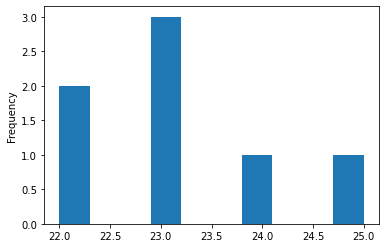

In [9]:
people.age.plot(kind='hist')
plt.show()

# Inspect columns of dataset

In [10]:
people.Country

0    United States
1           Canada
2          England
3              USA
4           Poland
5    United States
6      Switzerland
Name: Country, dtype: object

In [11]:
people.age.mean()

23.142857142857142

In [12]:
people.age.max()

25

# Create new columns in our ~SFrame~ Pandas

In [13]:
people

,First Name,Last Name,Country,age
0,Bob,Smith,United States,24
1,Alice,Williams,Canada,23
2,Malcolm,Jone,England,22
3,Felix,Brown,USA,23
4,Alex,Cooper,Poland,23
5,Tod,Campbell,United States,22
6,Derek,Ward,Switzerland,25


In [14]:
people['Full Name'] = people['First Name'] +' ' + people['Last Name']

In [15]:
people

,First Name,Last Name,Country,age,Full Name
0,Bob,Smith,United States,24,Bob Smith
1,Alice,Williams,Canada,23,Alice Williams
2,Malcolm,Jone,England,22,Malcolm Jone
3,Felix,Brown,USA,23,Felix Brown
4,Alex,Cooper,Poland,23,Alex Cooper
5,Tod,Campbell,United States,22,Tod Campbell
6,Derek,Ward,Switzerland,25,Derek Ward


In [17]:
people.age * people.age

0    576
1    529
2    484
3    529
4    529
5    484
6    625
Name: age, dtype: int64

# Use the apply function to do a advanced transformation of our data

In [18]:
people.Country

0    United States
1           Canada
2          England
3              USA
4           Poland
5    United States
6      Switzerland
Name: Country, dtype: object

In [20]:
people.Country.value_counts()

United States    2
Poland           1
USA              1
Canada           1
England          1
Switzerland      1
Name: Country, dtype: int64

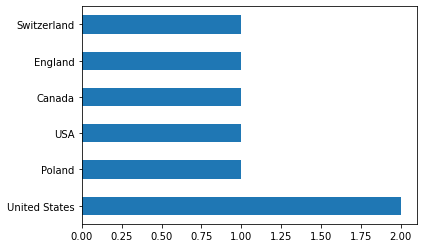

In [23]:
people.Country.value_counts().plot(kind='barh')
plt.show()

In [24]:
def tranform_country(country):
    if country == 'USA':
        return 'United States'
    else:
        return country

In [25]:
people.Country.apply(tranform_country)

0    United States
1           Canada
2          England
3    United States
4           Poland
5    United States
6      Switzerland
Name: Country, dtype: object

In [27]:
people['Country'] = people.Country.apply(tranform_country)

In [28]:
people

,First Name,Last Name,Country,age,Full Name
0,Bob,Smith,United States,24,Bob Smith
1,Alice,Williams,Canada,23,Alice Williams
2,Malcolm,Jone,England,22,Malcolm Jone
3,Felix,Brown,United States,23,Felix Brown
4,Alex,Cooper,Poland,23,Alex Cooper
5,Tod,Campbell,United States,22,Tod Campbell
6,Derek,Ward,Switzerland,25,Derek Ward
